# Lab03 Pandas 
## Stephen Blackwell
### 2/11/20

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading in the file

In [2]:
companies = pd.read_csv('lab03fortune500.csv', sep=',')
companies

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
...,...,...,...,...,...
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6


### Describing the file

In [3]:
companies.describe()

,Year,Rank,Revenue (in millions)
count,25500.00000,25500.000000,25500.000000
mean,1980.00000,250.499765,4273.329635
std,14.71989,144.339963,11351.884979
min,1955.00000,1.000000,49.700000
25%,1967.00000,125.750000,362.300000
50%,1980.00000,250.500000,1019.000000
75%,1993.00000,375.250000,3871.000000
max,2005.00000,500.000000,288189.000000


### dTypes

In [4]:
companies.dtypes

Year                       int64
Rank                       int64
Company                   object
Revenue (in millions)    float64
Profit (in millions)      object
dtype: object

### Cleaning profits column
#### Finding bad entries

In [5]:
profit = companies['Profit (in millions)']
bad = profit.str.contains('[^0-9.-]')
badEntries = companies[bad]
a = companies['Year'].count()
b = badEntries['Year'].count()
print("TOTAL COMPANIES-ENTRIES: ", a)
print("TOTAL BAD COMPANIES-ENTRIES: ", b)
print("TOTAL VALID COMPANIES-ENTRIES: ", a-b)
badEntries.head(5)


TOTAL COMPANIES-ENTRIES:  25500
TOTAL BAD COMPANIES-ENTRIES:  369
TOTAL VALID COMPANIES-ENTRIES:  25131


,Year,Rank,Company,Revenue (in millions),Profit (in millions)
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


#### Histogram of bad values

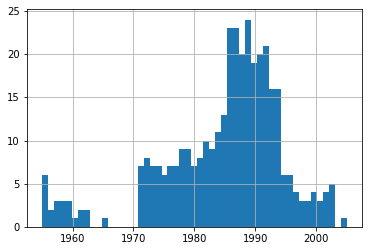

In [83]:
yearsBad = badEntries['Year']
bins = yearsBad.values
#INSTRUCTIONS SAY TO USE np.arrange BUT THE BINS ARE ALREADY SORTED BY YEAR
minYear = yearsBad.min()
maxYear = yearsBad.max()
binsCt = maxYear - minYear + 1

yearsBad.hist(bins = binsCt)

#### removing bad rows

In [84]:
goodIncomes = profit[~bad].astype(float)
companiesGood = companies[~bad]
companiesGood['Profits'] = goodIncomes

/opt/anaconda3/envs/dmml/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
companiesGood.dtypes

Year                       int64
Rank                       int64
Company                   object
Revenue (in millions)    float64
Profit (in millions)      object
Profits                  float64
dtype: object

### Creating the graph

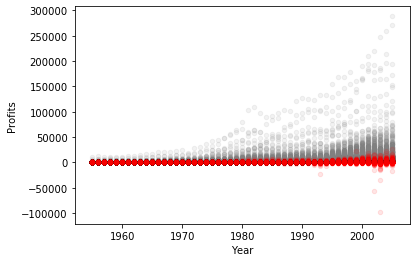

In [8]:
ax1 = companiesGood.plot(kind='scatter', x = "Year", y = 'Revenue (in millions)', color = 'grey', alpha = .1)
ax2 = companiesGood.plot(kind='scatter', x = "Year", y = 'Profits', color = 'r', alpha = .1, ax = ax1)

# Challenges

## Challenge 1

dtype('float64')

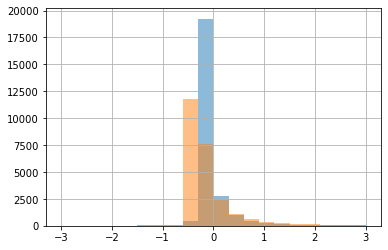

In [52]:
zScoreProfits = (companiesGood.Profits - companiesGood.Profits.mean())/companiesGood.Profits.std()
zScoreRevenues = (companiesGood['Revenue (in millions)'] - companiesGood['Revenue (in millions)'].mean())/companiesGood['Revenue (in millions)'].std()

zScoreProfits.hist(bins = 20,range=[-3, 3], alpha = .5)
zScoreRevenues.hist(bins = 20,range=[-3, 3], alpha = .5 )

zScoreProfits.dtype

## Challenge 2

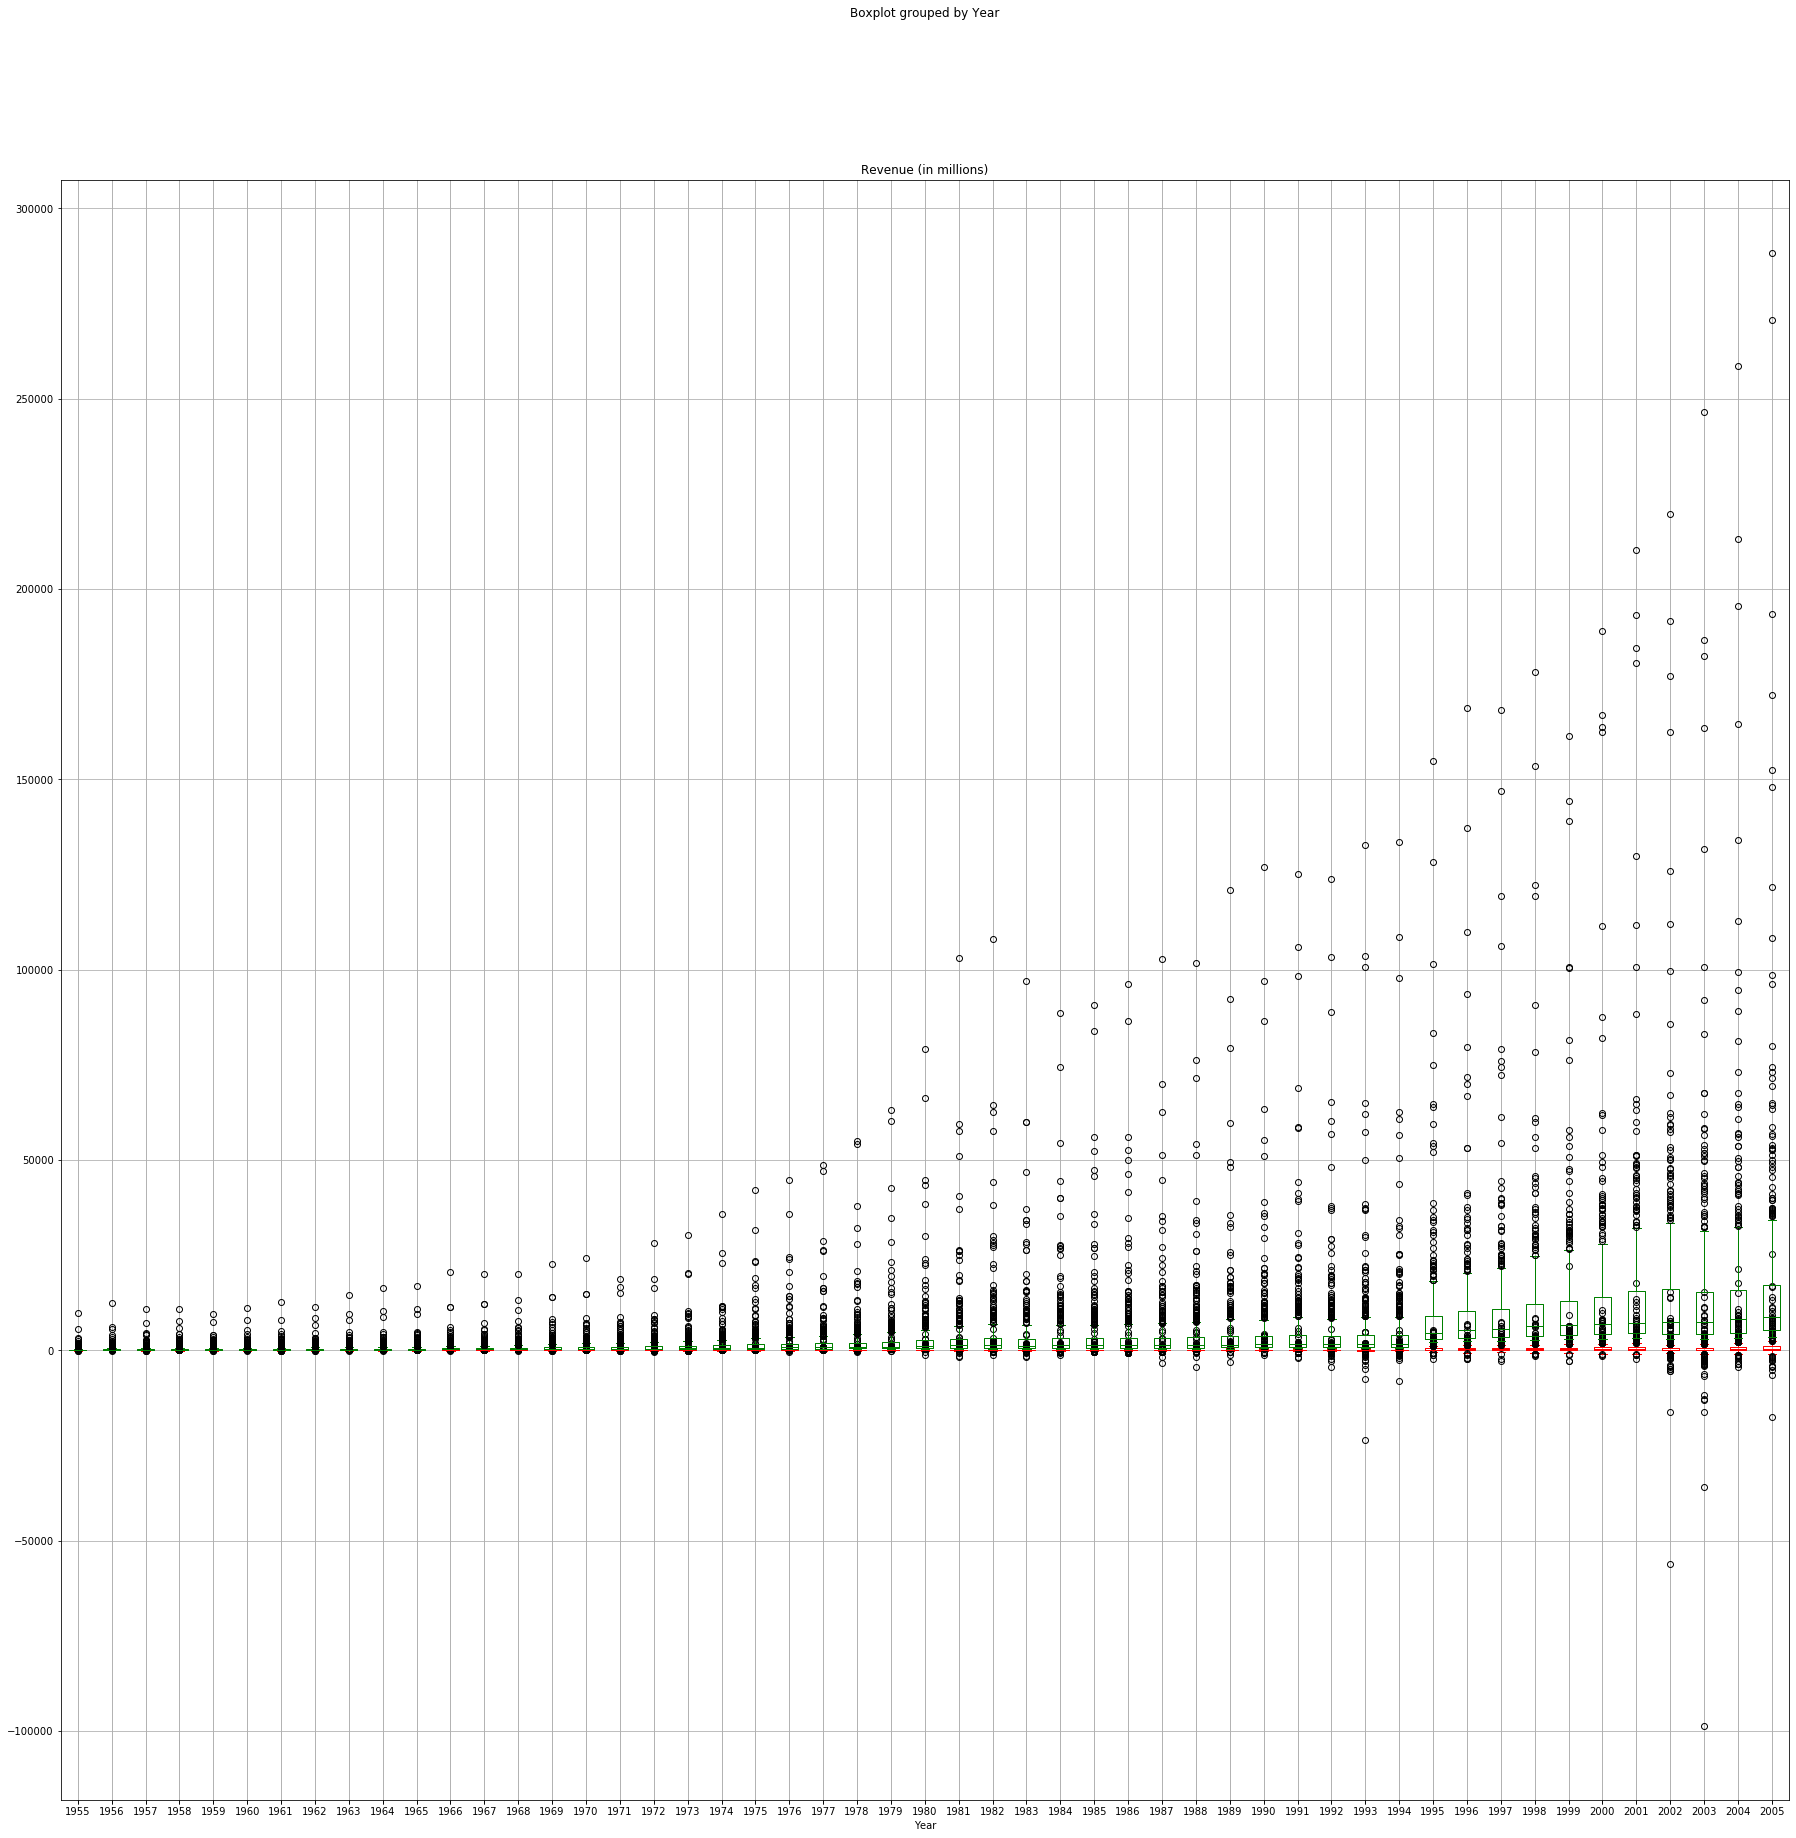

In [19]:
ax1 = companiesGood.boxplot(column = ['Profits'], by = 'Year', figsize=(30,30), color = 'r')
ax2 = companiesGood.boxplot(column = ['Revenue (in millions)'], by = 'Year', figsize=(30,30), color = 'g', ax = ax1)


## Challenge 3

In [44]:
correlations = companiesGood[['Year', 'Profits', 'Revenue (in millions)']].corr()
correlations

,Year,Profits,Revenue (in millions)
Year,1.000000,0.169832,0.365016
Profits,0.169832,1.000000,0.477046
Revenue (in millions),0.365016,0.477046,1.000000


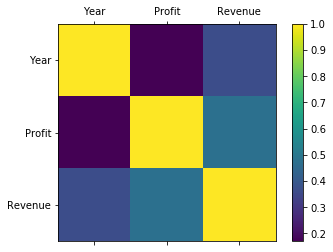

In [45]:
labels = ['Year', 'Profit', 'Revenue']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations)
fig.colorbar(cax)

ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)

plt.show()


## Challenge 4

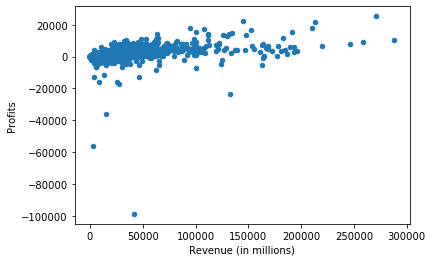

In [47]:
companiesGood.plot.scatter(y="Profits", x="Revenue (in millions)")

There does appear to be a weak correlation between profit and revenue. We see that lower revenues are loosly associated with loser profits, however most of the values are clustered around 0, but it trends very slightly upward.
This makes sense as it takes revenue to generate profit, but given that higher revenues are also associated with higher expenses it is hard to find a significant trend.

## Challenge 5

In [78]:
profitStd = companiesGood['Profits'][(zScoreProfits < 2) & (zScoreProfits > -2) & (zScoreRevenues < 2) & (zScoreRevenues > -2)]
revenueStd = companiesGood['Revenue (in millions)'][(zScoreRevenues < 2) & (zScoreRevenues > -2) & (zScoreProfits < 2) & (zScoreProfits > -2)]
sc['profitsStd'] = pd.DataFrame(data=profitStd)
sc['revenueStd'] = revenueStd
sc

,Profits,revenueStd,profitsStd
0,806.0,9823.5,806.0
1,584.8,5661.4,584.8
2,195.4,3250.4,195.4
3,212.6,2959.1,212.6
4,19.1,2510.8,19.1
...,...,...,...
25495,493.0,3648.6,493.0
25496,175.4,3631.6,175.4
25497,57.8,3630.4,57.8
25498,70.6,3616.6,70.6


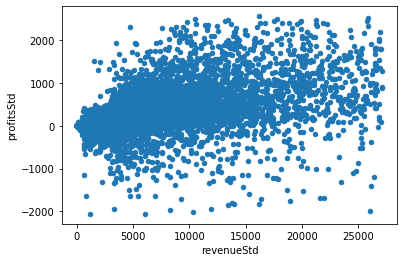

In [79]:
sc.plot.scatter(y='profitsStd', x='revenueStd')

With the outliers removed we see a very broad distribution. It is hard to say that there is a strong correlation in either direction, but profits do seem to trend slighly upwards as the revenue increases